In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to the range 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


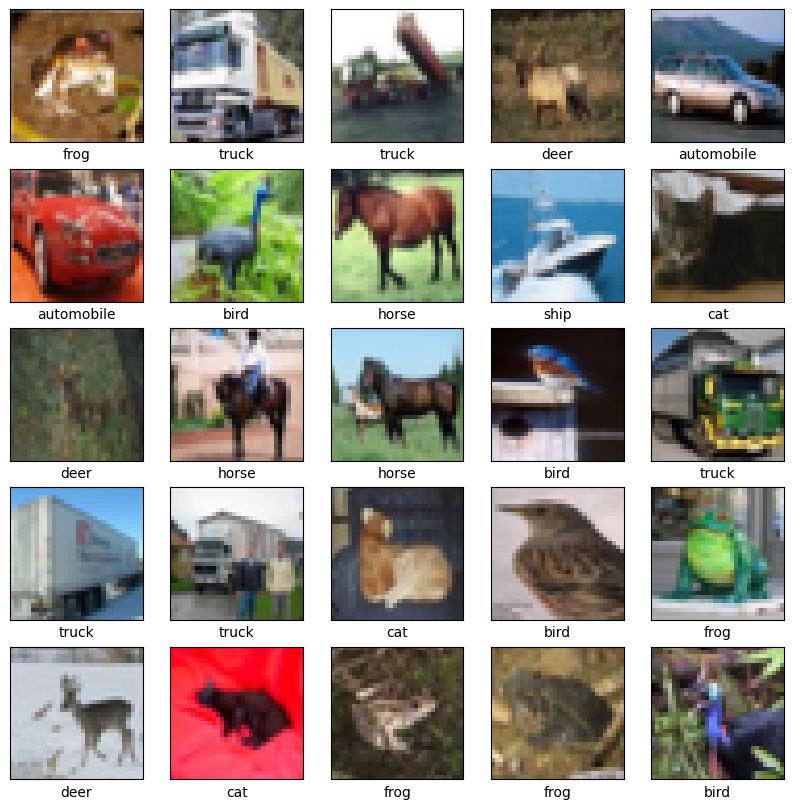

In [3]:
# Display a grid of sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [4]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(32, 32, 3)),  # Use Input layer here
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4052 - loss: 1.6760 - val_accuracy: 0.5481 - val_loss: 1.2955
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5716 - loss: 1.2301 - val_accuracy: 0.5888 - val_loss: 1.1802
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6108 - loss: 1.1212 - val_accuracy: 0.6076 - val_loss: 1.1198
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6469 - loss: 1.0243 - val_accuracy: 0.5847 - val_loss: 1.1824
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6664 - loss: 0.9734 - val_accuracy: 0.6396 - val_loss: 1.0590
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6847 - loss: 0.9177 - val_accuracy: 0.6362 - val_loss: 1.0600
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6973 - loss: 0.8892 - val_accuracy: 0.6250 - val_loss: 1.1005
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7085 - loss: 

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")


313/313 - 1s - 3ms/step - accuracy: 0.6452 - loss: 1.0523

Test accuracy: 0.6452000141143799


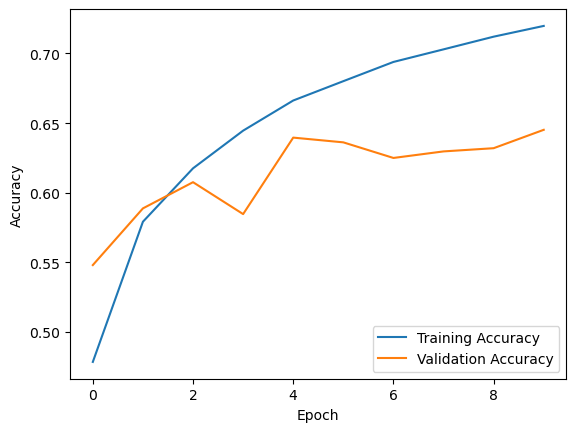

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


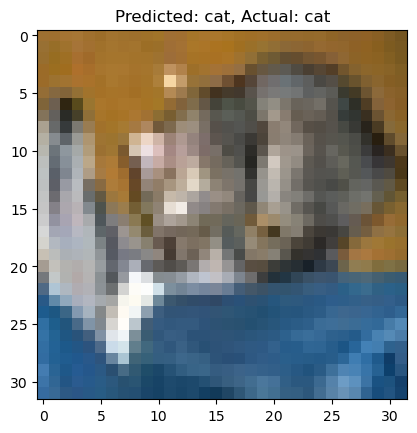

In [9]:
# Make predictions on test data
predictions = model.predict(test_images)

# Display an example prediction
i = 0
plt.imshow(test_images[i])
plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, Actual: {class_names[test_labels[i][0]]}")
plt.show()
